In [25]:
# Question 1.1
import numpy as np
from scipy.linalg import qr
import matplotlib.pyplot as plt

x_arr = np.array([0, 0.25, 0.5, 0.75, 1.0])
y_arr = np.array([0, 0.009, 0.014, 0.018, 0.021])

# quadratic fit matrix
A = np.vstack([x_arr**2, x_arr, np.ones_like(x_arr)]).T

Q, R = qr(A, mode='economic') # economic for rectangle shape
b = Q.T @ y_arr
x = np.linalg.solve(R, b)

c, b, a = x
print(f"Coefficients [c, b, a]: {x}")

# relative residual normalized
y_fitted = A @ x
residual = np.linalg.norm(y_fitted - y_arr) / np.linalg.norm(y_arr)
print(f"Relative residual norm (normalized): {residual}")

Coefficients [c, b, a]: [-0.01485714  0.03525714  0.00034286]
Relative residual norm (normalized): 0.031418349660127826


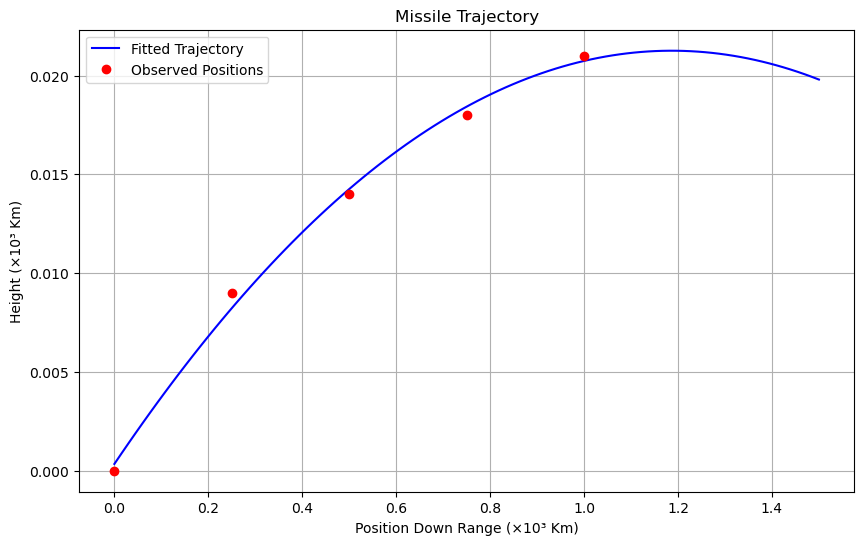

In [26]:
# Question 1.2

x_smooth = np.linspace(0, 1.5, 100)
y_smooth = c * x_smooth**2 + b * x_smooth + a

plt.figure(figsize=(10, 6))
plt.plot(x_smooth, y_smooth, 'b-', label='Fitted Trajectory')
plt.plot(x_arr, y_arr, 'ro', label='Observed Positions')
plt.xlabel('Position Down Range (×10³ Km)')
plt.ylabel('Height (×10³ Km)')
plt.title('Missile Trajectory')
plt.grid(True)
plt.legend()
plt.show()

In [27]:
# Question 1.3

# quadratic equation as cx² + bx + a = 0
roots = np.roots([c, b, a])
landing_position = max(roots[roots.real >= 0])
print(f"Predicted landing position: {landing_position:.3f} (×10³ Km)")

Predicted landing position: 2.383 (×10³ Km)
